<a href="https://colab.research.google.com/github/Groupac/Collab/blob/master/3%20%D0%98%D0%A1%20%D0%90%D1%87%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%20%D0%90%D0%BB%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
       a = 1.0*np.array(data)
       n = len(a)
       m, se = np.mean(a), scipy.stats.sem(a)
       h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
       return m, m-h, m+h

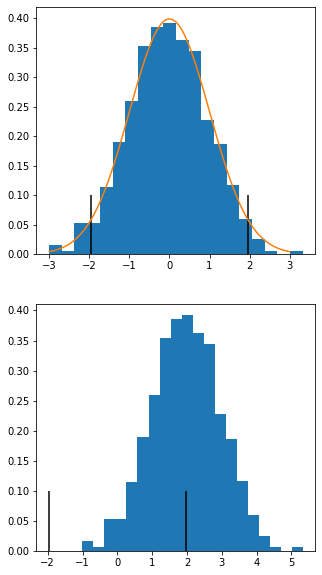

In [ ]:
#Построение точных доверительных интервалов


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


N = 100
M = 1000
xs = 0.2
mu = 2
sigma = 10

a1 = np.array([])
a2 = np.array([])

for _ in range(M):
    x = np.random.normal(mu, sigma, N)
    a1 = np.append(a1, (N**0.5)*(np.mean(x) - mu)/sigma)
    a2 = np.append(a2, (np.mean(x)))


fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(a1, bins = 20, density=True)
b1 = np.linspace(-3, 3, 1000)
ax1.plot(b1, norm.pdf(b1))
ax1.vlines(norm.ppf(1-0.025), 0, 0.1)
ax1.vlines(-norm.ppf(1-0.025), 0, 0.1)

ax2.hist(a2, bins = 20, density=True)
ax2.vlines(np.mean(b1)-(sigma*norm.ppf(1-0.025))/(N**0.5), 0, 0.1)
ax2.vlines(np.mean(b1)+(sigma*norm.ppf(1-0.025))/(N**0.5), 0, 0.1)

plt.show()